---
# *SOFTMAX*
---
1. *OneHotEncoding*
2. *Softmax Regression*
3. *Softmax Cost*
4. *Softmax Regression Create*
5. *MNIST Training*

### ***1. OneHotEncoding***

 - *라벨링의 갯수만큼 차원을 가짐 (ex: 사물 3개에 대한 원-핫인코딩을 하게되면 3차원의 배열이 생성됨)*
 - *이때 데이터의 수는 행의 갯수가 됨*
 - *단순히 정수 인코딩을 할 경우 각 사물에 대한 라벨(1,2,3 등)의 값을 컴퓨터는 거리로 계산하여 동일하게 오차를 냈을 경우 라벨링 값에 따라 더 큰 오차를 만들 문제점이 발생함 (but 순서척도일 경우는 정수라벨링이 가능)*
 - *원-핫인코딩을 사용하게되면 동일한 오차값을 가질 수 있게 됨*

### ***2. Softmax Regression***

 1. *Multi-Class Classification* 
     - softmax regression : 가설 : H(X)=softmax(WX+B) <br>
![](https://wikidocs.net/images/page/59427/%EC%86%8C%ED%94%84%ED%8A%B8%EB%A7%A5%EC%8A%A4%ED%9A%8C%EA%B7%80.PNG)

 2. *Softmax Function* 
     - $p_i= \frac {e^zi} {\sum_{j=1}^K e^zj}$ for i=1,2,...k
     - *softmax(z)* = $[ \frac {e^z1}{\sum_{j=1}^3 e^zj}, \frac {e^z2}{\sum_{j=1}^3 e^zj}, \frac {e^z3}{\sum_{j=1}^3 e^zj}] = [p_1,p_2,p_3]$ = ŷ =예측값 (k=3일때) <br>
![](https://wikidocs.net/images/page/59427/%EA%B0%80%EC%84%A4.PNG)   *c = 클래스(label) 갯수 / f = 변수(x) 갯수*

 3. *Cost Function*
     - Cross Entropy : 왜 비용함수에 log(softmax)일까 / 왜 log가 쓰이는 것일까?
          - *cost(W)* = $ - {\sum_{j=1}^k y_i\log(p_j)} $  : 1 data
          - *cost(W)* = $ - \frac{1}{n}{\sum_{i=1}^n}{\sum_{j=1}^k y_i^{(i)}\log(p_j^{(i)})} $  : n data
     

### ***3. Softmax Cost***

  - ***1) low-level***
  - ***2) high-level***

#### ***`low-level`*** *`softmax cost function`*

In [3]:
import torch
import torch.nn.functional as F
torch.manual_seed(1)

In [6]:
# 1 x 3 시그모이드 함수 사용
z = torch.FloatTensor([1, 2, 3])
hypothesis = F.softmax(z, dim=0)
print(hypothesis)
print(hypothesis.sum())

tensor([0.0900, 0.2447, 0.6652])
tensor(1.)


In [8]:
# 5 x 3 시그모이드 함수 사용
z = torch.rand(3, 5, requires_grad=True) # 3 x 5 행렬
hypothesis = F.softmax(z, dim=1)
print(hypothesis)
print(hypothesis.sum(dim=1))

tensor([[0.1664, 0.1871, 0.1737, 0.2695, 0.2033],
        [0.2002, 0.1783, 0.2218, 0.1944, 0.2054],
        [0.1809, 0.2380, 0.2318, 0.1084, 0.2409]], grad_fn=<SoftmaxBackward>)
tensor([1., 1., 1.], grad_fn=<SumBackward1>)


In [13]:
# 임의의 라벨 생성
y = torch.randint(5, (3,)).long()
print(y)
print(y.shape)
print(y.unsqueeze(1).shape)

tensor([3, 1, 2])
torch.Size([3])
torch.Size([3, 1])


In [14]:
y_one_hot = torch.zeros_like(hypothesis) # 이전에 만든 3x5 행렬크기의 zero 행렬 생성
y_one_hot.scatter_(1, y.unsqueeze(1), 1) # (dim=1에대해, y.unsqueeze(1)의 위치에, 숫자 1을 넣어줌)

tensor([[0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.]])

*cost(W)* = $ \frac{1}{n}{\sum_{i=1}^n}{\sum_{j=1}^k y_i^{(i)}  (- \log(p_j^{(i)}))} $  구현

In [17]:
# 비용함수 구하기
cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()
print(cost)

tensor(1.4992, grad_fn=<MeanBackward0>)


#### ***`high-level`*** *`softmax cost function`*

In [16]:
# 비용함수 구하기
# Low level
print(torch.log(F.softmax(z, dim=1)))

# High level
print(F.log_softmax(z, dim=1))

tensor([[-1.7935, -1.6760, -1.7504, -1.3114, -1.5929],
        [-1.6086, -1.7244, -1.5062, -1.6381, -1.5826],
        [-1.7096, -1.4354, -1.4617, -2.2223, -1.4236]], grad_fn=<LogBackward>)
tensor([[-1.7935, -1.6760, -1.7504, -1.3114, -1.5929],
        [-1.6086, -1.7244, -1.5062, -1.6381, -1.5826],
        [-1.7096, -1.4354, -1.4617, -2.2223, -1.4236]],
       grad_fn=<LogSoftmaxBackward>)


In [20]:
# Low level
# 첫번째 수식
print((y_one_hot * -torch.log(F.softmax(z, dim=1))).sum(dim=1).mean())

# 두번째 수식
print((y_one_hot * - F.log_softmax(z, dim=1)).sum(dim=1).mean())

# High level
# 세번째 수식
print(F.nll_loss(F.log_softmax(z, dim=1), y)) # 원핫인코딩을 할 필요가 없음

# 네번째 수식
print(F.cross_entropy(z, y)) # y, f(x)

tensor(1.4992, grad_fn=<MeanBackward0>)
tensor(1.4992, grad_fn=<MeanBackward0>)
tensor(1.4992, grad_fn=<NllLossBackward>)
tensor(1.4992, grad_fn=<NllLossBackward>)


### ***3. Softmax Regression Create***

  - ***1) low-level***
  - ***2) high-level***
  - ***3) nn.Module***
  - ***4) class***

In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

# 4 factor
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
# 3 class
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)
print(x_train.shape)
print(y_train.shape)

torch.Size([8, 4])
torch.Size([8])


#### ***`low-level`***

In [25]:
y_one_hot = torch.zeros(x_train.shape[0], 3)
y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)
print(y_one_hot.shape)

torch.Size([8, 3])


In [26]:
# 가중치 초기화
w = torch.zeros((x_train.shape[1], y_one_hot.shape[1]), requires_grad=True) # (8,4) x (4,3) = (8,3)
b = torch.zeros(1, requires_grad=True)

# optimizer
optimizer = optim.SGD([w,b], lr=0.1)

In [28]:
epochs = 1000
for epoch in range(epochs+1):
    
    hypothesis = F.softmax(x_train.matmul(w) + b)
    
    cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 200 == 0:
         print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, epochs, cost.item()
        ))

<ipython-input-28-12d3e06140a0>:4: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  hypothesis = F.softmax(x_train.matmul(w) + b)


Epoch    0/1000 Cost: 1.098612
Epoch  200/1000 Cost: 0.689991
Epoch  400/1000 Cost: 0.604117
Epoch  600/1000 Cost: 0.533922
Epoch  800/1000 Cost: 0.466908
Epoch 1000/1000 Cost: 0.399962


#### ***`high-level`***

In [31]:
# 모델 초기화
w = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([w, b], lr=0.1)

epochs = 1000
for epoch in range(epochs+1):
    
    z = x_train.matmul(w) + b
    
    cost = F.cross_entropy(z, y_train)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 200 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.098612
Epoch  200/1000 Cost: 0.689991
Epoch  400/1000 Cost: 0.604117
Epoch  600/1000 Cost: 0.533922
Epoch  800/1000 Cost: 0.466908
Epoch 1000/1000 Cost: 0.399963


#### ***`nn.Module`***

In [36]:
# 모델을 선언 및 초기화. 4개의 특성을 가지고 3개의 클래스로 분류. input_dim=4, output_dim=3.
model = nn.Linear(4, 3) # 가중치 설정 역할

# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.cross_entropy(prediction, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 200 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 2.894385
Epoch  200/1000 Cost: 0.631103
Epoch  400/1000 Cost: 0.523610
Epoch  600/1000 Cost: 0.430080
Epoch  800/1000 Cost: 0.338987
Epoch 1000/1000 Cost: 0.253871


#### ***`Class`***

In [37]:
class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(4, 3)
    
    def forward(self, x):
        return self.linear(x)

In [38]:
model = SoftmaxClassifierModel()

# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)

epochs = 1000
for epoch in range(epochs+1):
    
    prediction = model(x_train)
    
    cost = F.cross_entropy(prediction, y_train)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 200 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.769795
Epoch  200/1000 Cost: 0.604961
Epoch  400/1000 Cost: 0.497643
Epoch  600/1000 Cost: 0.403282
Epoch  800/1000 Cost: 0.311439
Epoch 1000/1000 Cost: 0.239820


### ***4. MNIST Training***


In [42]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

# for reproducibility
random.seed(777)
torch.manual_seed(777)

In [41]:
USE_CUDA = torch.cuda.is_available() # GPU를 사용가능하면 True, 아니라면 False를 리턴
device = torch.device("cuda" if USE_CUDA else "cpu") # GPU 사용 가능하면 사용하고 아니면 CPU 사용
print("다음 기기로 학습합니다:", device)

다음 기기로 학습합니다: cpu


In [43]:
# hyperparameters
training_epochs = 15
batch_size = 100

In [44]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw
Processing...
Done!


/Users/depark/opt/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


 > *DataLoader(dataset, batch_size, shuffle, drop_last)* <br>
 ***drop_lst :*** *마지막 배치사이즈를 버릴건지의 여부* <br>
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; *ex) 1000개의 데이터셋에서 128을 배치사이즈로 설정할 경우 1epoch당 7iteration이 생성되고 104개의 데이터가 남는다.* <br> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;*이때 이 데이터마저 학습에 사용할건지의 여부를 묻는것.* <br>
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;*상대적으로 개수가 적은 마지막 배치가 경사하강법에 사용되면서 상대적으로 과적합이 될 가능성을 막아줌* <br>

In [56]:
data_loader = DataLoader(mnist_train, batch_size = batch_size, shuffle=True, drop_last = True) # 60000/100 = 600
print(len(data_loader))

600


In [58]:
# mnist data = 28 x 28
# input : 28x28=784 output : 10
linear = nn.Linear(784, 10, bias=True).to(device) # bias=True is default

# 비용 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss().to(device) # 앞서 사용한 F.cross_entropy()함수와 동일
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

for epoch in range(training_epochs): # 앞서 training_epochs의 값은 15로 지정함.
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        # 배치 크기가 100이므로 아래의 연산에서 X는 (100, 784)의 텐서가 된다.
        X = X.view(-1, 28 * 28).to(device)
        # 레이블은 원-핫 인코딩이 된 상태가 아니라 0 ~ 9의 정수.
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.534912467
Epoch: 0002 cost = 0.359308660
Epoch: 0003 cost = 0.331088185
Epoch: 0004 cost = 0.316574216
Epoch: 0005 cost = 0.307130307
Epoch: 0006 cost = 0.300207913
Epoch: 0007 cost = 0.294897258
Epoch: 0008 cost = 0.290830433
Epoch: 0009 cost = 0.287419558
Epoch: 0010 cost = 0.284588993
Epoch: 0011 cost = 0.281816244
Epoch: 0012 cost = 0.279919624
Epoch: 0013 cost = 0.277836829
Epoch: 0014 cost = 0.276022315
Epoch: 0015 cost = 0.274443209
Learning finished


In [59]:
X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
Y_test = mnist_test.test_labels.to(device)

/Users/depark/opt/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:63: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/Users/depark/opt/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:53: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


> *torch.argmax(input, dim)* <br>
*차원에서의 최대값 인덱스를 가져옴*

Accuracy:88.68%
Label:  9
Prediction:  9


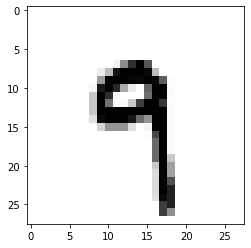

In [76]:
# 테스트 데이터를 사용하여 모델을 테스트한다.
with torch.no_grad(): # torch.no_grad()를 하면 gradient 계산을 수행하지 않는다.
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test # True / False
    accuracy = correct_prediction.float().mean()
    print('Accuracy:{}%'.format(round(accuracy.item()*100, 2)))

    # MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측을 해본다
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()